<a href="https://www.analytiksinc.com">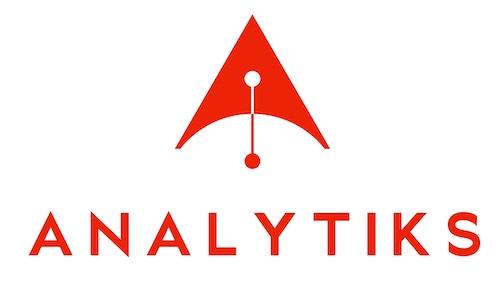</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

# Predicting Survival on the Titanic (Classification)

<b>Dataset:</b> <i>Titanic_Clean.csv</i> <br>

<b>Description:</b><br>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

<b>Features:</b>

- Survived: Survival (Target)	
    - 0 : No 
    - 1 : Yes 
- Pclass: Ticket class	
    - 1 : 1st
    - 2 : 2nd 
    - 3 : 3rd
- Sex: Sex	
    - 0 : Male
    - 1 : Female
- Age: Age Group	
    - 1 : Baby 
    - 2 : Child
    - 3 : Teenager 
    - 4 : Young Adult
    - 5 : Adult 
    - 6 : Middle-Aged
    - 7 : Elderly
- SibSp: # of siblings / spouses aboard the Titanic	
- Parch: # of parents / children aboard the Titanic	
- FareBand: Passenger fare	
- Title: Title based on name	
    - 1 : Mr
    - 2 :Miss
    - 3 : Mrs
    - 4 :Master
    - 5 :Royal
    - 6 : Rare
- Embarked: Port of Embarkation	 
    - 1 : Southampton
    - 2 : Cherbourg
    - 3 : Queenstown

<b>Objectives:</b>
- Load and Explore the Dataset
- Split into Training and Test Set (see instructions below)
- Build the following models using the Training Set (using default parameters):
    - Logistic Regression
    - KNN
    - Gaussian Naive Bayes
    - Decision Tree
- Print the Accuracy Score of each model using the Test Set

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

#Train-Test Split
from sklearn.model_selection import train_test_split

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Import the KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

#sklearn implementation of the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

#Importing the Tree and Metrics Module
from sklearn.tree import DecisionTreeClassifier

#Import the Cross Validation Score function
from sklearn.model_selection import cross_val_score

## Load and Explore the Dataset

In [3]:
df = pd.read_csv('../Datasets/Titanic_Clean.csv')
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,1,0,3,0,1,0,1,1,4,1
1,2,1,1,1,1,0,2,3,6,4
2,3,1,3,1,0,0,1,2,5,2
3,4,1,1,1,1,0,1,3,5,4
4,5,0,3,0,0,0,1,1,5,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,1,6,5,2
887,888,1,1,1,0,0,1,2,4,3
888,889,0,3,1,1,2,1,2,4,3
889,890,1,1,0,0,0,2,1,5,3


In [4]:
df = df.set_index(df.columns[0])
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
PassengerId,,,,,,,,,
1,0,3,0,1,0,1,1,4,1
2,1,1,1,1,0,2,3,6,4
3,1,3,1,0,0,1,2,5,2
4,1,1,1,1,0,1,3,5,4
5,0,3,0,0,0,1,1,5,2
...,...,...,...,...,...,...,...,...,...
887,0,2,0,0,0,1,6,5,2
888,1,1,1,0,0,1,2,4,3
889,0,3,1,1,2,1,2,4,3


### Inspect  Data

In [5]:
df.describe(include='all')

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.523008,0.381594,1.361392,1.751964,4.636364,2.497194
std,0.486592,0.836071,0.477990,1.102743,0.806057,0.635673,1.112838,1.353390,1.118156
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.500000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,2.000000,6.000000,3.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,3.000000,6.000000,7.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Embarked  891 non-null    int64
 6   Title     891 non-null    int64
 7   AgeGroup  891 non-null    int64
 8   FareBand  891 non-null    int64
dtypes: int64(9)
memory usage: 69.6 KB


## Prepare Train and Test data

### Separate y (target) from x (predictor) columns
*Note: for the predictor columns, review the features to determine if any of the features should not be included in building the model*

In [7]:
x = df.drop('Survived', axis=1)
y = df['Survived']

### Split into train and test partitions using the train_test_split function
test_size should be 22% and random_state = 20

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=20)

## Build and Validate Models

#### Build models on the following algorithms and report ACCURACY SCORE on the test dataset
1. Logistic Regression 
2. KNN
3. Gaussian Naive Bayes
4. Decision Tree Classifier

*Note: Accuracy Score should be presented as a percentage*<br>
*Note: For models that have a random_state parameter, set random_state = 20*

### 1. Logistic Regression

In [9]:
#Instantiate the Algorithm 
logreg = LogisticRegression(random_state=20)

#Train/Fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=20)

In [10]:
#Create a DataFrame for easy understanding. 1st Column will be Feature Names, 2nd column will be the Coef values

coef = pd.DataFrame(x_train.columns, columns=["Features"])

coef['Coef'] = logreg.coef_.reshape(-1,1)

#Optional: Sort Descending (highest value first) 
coef_sorted = coef.sort_values("Coef", ascending=False)

coef_sorted.head(10)

,Features,Coef
1,Sex,2.322865
7,FareBand,0.414228
5,Title,0.294955
4,Embarked,0.189931
3,Parch,-0.335409
6,AgeGroup,-0.420716
2,SibSp,-0.479995
0,Pclass,-0.838625


In [11]:
y_pred = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)
df_prob = pd.DataFrame(y_prob, index=x_test.index, columns=['prob_0', 'prob_1'])
df_prob = df_prob.join(y_test)
df_prob['pred'] = y_pred
df_prob

,prob_0,prob_1,Survived,pred
PassengerId,,,,
348,0.488666,0.511334,1,1
675,0.876159,0.123841,0,0
792,0.571179,0.428821,0,0
837,0.876558,0.123442,0,0
57,0.182991,0.817009,1,1
...,...,...,...,...
25,0.465591,0.534409,0,1
855,0.292356,0.707644,0,1
353,0.929512,0.070488,0,0


In [12]:
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(random_state=20):
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       123
           1       0.77      0.72      0.74        74

    accuracy                           0.81       197
   macro avg       0.80      0.79      0.80       197
weighted avg       0.81      0.81      0.81       197




Text(0.5, 23.5, 'Predicted label')

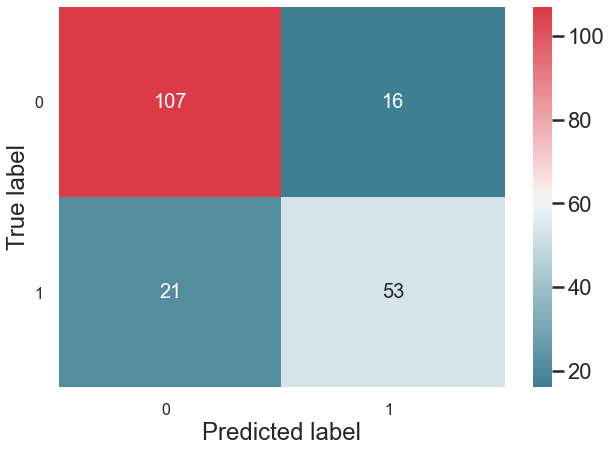

In [13]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

#Set attributes for Plot
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Use the Seaborn Heatmap function and pass the confusion matrix dataframe
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d",  cmap=cmap)

#Set attributes for the heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2. KNN (k-Nearest Neighbors)

In [14]:
#Instatiate the model
knn = KNeighborsClassifier()

#Fit the model to the training set
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(x_test)
y_prob = knn.predict_proba(x_test)
df_prob = pd.DataFrame(y_prob, index=x_test.index, columns=['prob_0', 'prob_1'])
df_prob = df_prob.join(y_test)
df_prob['pred'] = y_pred
df_prob

,prob_0,prob_1,Survived,pred
PassengerId,,,,
348,0.6,0.4,1,0
675,1.0,0.0,0,0
792,1.0,0.0,0,0
837,1.0,0.0,0,0
57,0.2,0.8,1,1
...,...,...,...,...
25,0.8,0.2,0,0
855,0.4,0.6,0,1
353,1.0,0.0,0,0


In [16]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       123
           1       0.76      0.68      0.71        74

    accuracy                           0.80       197
   macro avg       0.79      0.77      0.78       197
weighted avg       0.79      0.80      0.79       197




Text(0.5, 23.5, 'Predicted label')

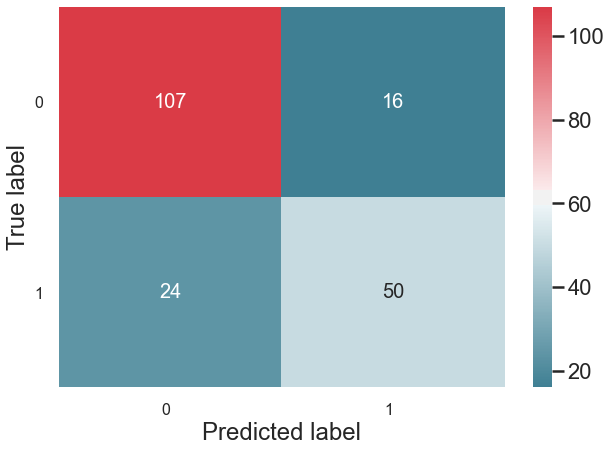

In [17]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

#Set attributes for Plot
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Use the Seaborn Heatmap function and pass the confusion matrix dataframe
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d",  cmap=cmap)

#Set attributes for the heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 3. Gaussian Naive Bayes

In [18]:
#Instantiate the Algorithm 
gnb = GaussianNB()

#Train the model
gnb.fit(x_train,y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(x_test)
y_prob = gnb.predict_proba(x_test)
df_prob = pd.DataFrame(y_prob, index=x_test.index, columns=['prob_0', 'prob_1'])
df_prob = df_prob.join(y_test)
df_prob['pred'] = y_pred
df_prob

,prob_0,prob_1,Survived,pred
PassengerId,,,,
348,0.112278,0.887722,1,1
675,0.967313,0.032687,0,0
792,0.794810,0.205190,0,0
837,0.963827,0.036173,0,0
57,0.153315,0.846685,1,1
...,...,...,...,...
25,0.684943,0.315057,0,0
855,0.053556,0.946444,0,1
353,0.950085,0.049915,0,0


In [20]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (gnb, classification_report(y_test, y_pred)))

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       123
           1       0.78      0.81      0.79        74

    accuracy                           0.84       197
   macro avg       0.83      0.84      0.83       197
weighted avg       0.84      0.84      0.84       197




Text(0.5, 23.5, 'Predicted label')

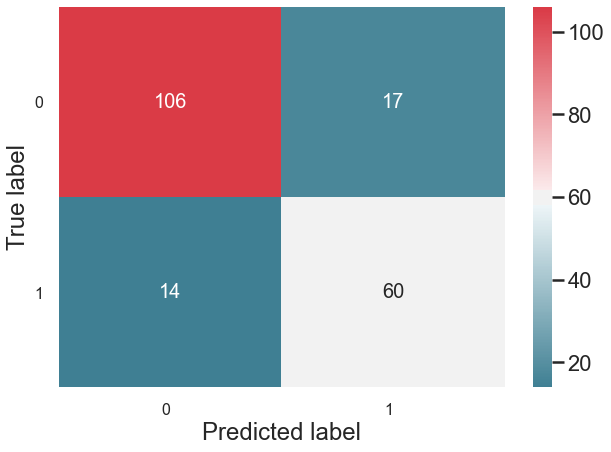

In [21]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

#Set attributes for Plot
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Use the Seaborn Heatmap function and pass the confusion matrix dataframe
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d",  cmap=cmap)

#Set attributes for the heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 4. Decision Tree

In [22]:
#Instantiate the Algorithm
clf = DecisionTreeClassifier(random_state=20)

#Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

In [23]:
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)
df_prob = pd.DataFrame(y_prob, index=x_test.index, columns=['prob_0', 'prob_1'])
df_prob = df_prob.join(y_test)
df_prob['pred'] = y_pred
df_prob

,prob_0,prob_1,Survived,pred
PassengerId,,,,
348,0.500000,0.500000,1,0
675,1.000000,0.000000,0,0
792,1.000000,0.000000,0,0
837,0.941176,0.058824,0,0
57,0.500000,0.500000,1,0
...,...,...,...,...
25,1.000000,0.000000,0,0
855,0.000000,1.000000,0,1
353,0.000000,1.000000,0,1


In [24]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(random_state=20):
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       123
           1       0.70      0.66      0.68        74

    accuracy                           0.77       197
   macro avg       0.75      0.75      0.75       197
weighted avg       0.76      0.77      0.77       197




Text(0.5, 23.5, 'Predicted label')

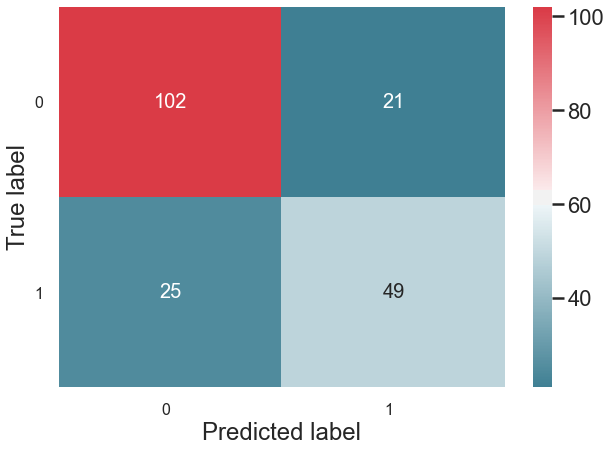

In [25]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

#Set attributes for Plot
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Use the Seaborn Heatmap function and pass the confusion matrix dataframe
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d",  cmap=cmap)

#Set attributes for the heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Cross validate

In [26]:
metric = 'accuracy'

In [27]:
logreg = LogisticRegression(random_state=20)
cv_results = cross_val_score(logreg, x, y, cv=10, scoring=metric)

#Get the Mean to get the average accuracy
print(np.mean(cv_results))

0.8125593008739076


In [28]:
knn = KNeighborsClassifier()
cv_results = cross_val_score(knn, x, y, cv=10, scoring=metric)

#Get the Mean to get the average accuracy
print(np.mean(cv_results))

0.8205118601747815


In [29]:
gnb = GaussianNB()
cv_results = cross_val_score(gnb, x, y, cv=10, scoring=metric)

#Get the Mean to get the average accuracy
print(np.mean(cv_results))

0.7833957553058677


In [30]:
clf = DecisionTreeClassifier(random_state=20)
cv_results = cross_val_score(clf, x, y, cv=10, scoring=metric)

#Get the Mean to get the average accuracy
print(np.mean(cv_results))

0.8036079900124843
